# one hot auc 

In [3]:
import sys
sys.path.append("/home/elliottqian/Documents/PycharmProjects/deeplearning_notebook/mxnet_study")
from movielens.fm_basic import MyMutEmbedding
from movielens.preprocess import get_csv_file_batch_tier
from movielens.one_hot_layer import OneHotLayer
from movielens.simple_fm_for_movielens import get_trainer, train_model, get_train_data_in_memory

import numpy as np
import mxnet as mx
from mxnet import gluon
from mxnet import autograd
from sklearn import metrics

/mnt/D/Ubuntu/package/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


gpu(0)


In [4]:
dim_array = [2, 7, 21, 3706, 301]
my_net = gluon.nn.Sequential()
with my_net.name_scope():
    my_net.add(OneHotLayer(dim_array))
    my_net.add(gluon.nn.Dense(1, activation='sigmoid'))
my_net.initialize()

In [5]:
my_net.collect_params()

sequential0_ (
  Parameter sequential0_dense0_weight (shape=(1, 0), dtype=<class 'numpy.float32'>)
  Parameter sequential0_dense0_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [6]:
csv_path = '/home/elliottqian/Documents/PycharmProjects/deeplearning_notebook/mxnet_study/movielens/part.csv'
trainer = get_trainer(my_net, sgd_type="sgd", learning_rate=0.5)


11.776515805


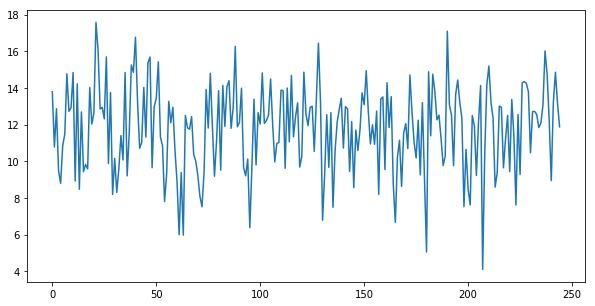

In [7]:
train_model(1, trainer, my_net, csv_path, data_shape=(6,), batch_size=4096)

In [13]:
train_y, train_X = get_train_data_in_memory(csv_path)
train_X = train_X[20000:30000]
train_y = train_y[20000:30000]
train_y = np.array(train_y)
predict_y = my_net(mx.nd.array(train_X))
predict_y_np = predict_y.asnumpy()
test_auc = metrics.roc_auc_score(train_y, predict_y_np)
print(test_auc)

0.513739882181
